Подключение диска

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Подключение TensorFlow и проверка версии

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Версия TensorFlow:", tf.__version__)

# Проверка доступных устройств GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU доступен:", gpus)
else:
    print("GPU недоступен для TensorFlow.")
print("Доступные устройства:", tf.config.list_physical_devices('GPU'))
gpus = tf.config.list_physical_devices('GPU')

Num GPUs Available:  0
Версия TensorFlow: 2.14.0
GPU недоступен для TensorFlow.
Доступные устройства: []


Определение наличия проекта в папке на гугл диске

In [3]:
import os
k=os.listdir('/content/gdrive/MyDrive/Projects')
if k=='':
  print('Необходимо загрузить папку проекта на диск')
else:
  k

Распаковка архива, загруженного на диск

In [4]:
import zipfile

# Путь к архиву на Google Drive. **Измените на путь к вашему zip-файлу**
zip_path = '/content/gdrive/MyDrive/Projects/SP.zip' # **Replace your_zip_file.zip with the actual file name**
extract_path = '/content/gdrive/MyDrive/Projects/'

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Переход в папку проекта
os.chdir(extract_path)

Установка необходимых библиотек

In [5]:
%%capture
!pip install -r '/content/gdrive/MyDrive/Projects/SP/requirements.txt'


Вывод установленных библиотек

In [6]:
!python -m pip freeze

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
alembic==1.14.0
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.88
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmaes==0.11.1
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlog==6.9.0
colorlover==0.3.0
colour==0.1.5
community==1.

Импорт необходимых библиотек

In [7]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Tuple

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [10]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import math

Функции

In [11]:
def load_data(file_path: str) -> pd.DataFrame:
    """
    Загружает данные из CSV-файла.

    :param file_path: Путь к файлу.
    :return: DataFrame с загруженными данными.
    """
    return pd.read_csv(file_path)

In [12]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Предобработка данных: удаление пропусков, создание новых признаков.

    :param df: Исходный DataFrame.
    :return: DataFrame после предобработки.
    """
    # Удаление строк с пропущенными значениями
    df = df.dropna()

    # Пример создания нового признака
    if 'date_registration' in df.columns and 'date_unregistration' in df.columns:
        df['duration'] = pd.to_datetime(df['date_unregistration']) - pd.to_datetime(df['date_registration'])
        df['duration'] = df['duration'].dt.days

    # Преобразование категориальных признаков в числовые
    df = pd.get_dummies(df, drop_first=True)

    return df

In [13]:
def split_data(df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Делит данные на обучающую и тестовую выборки.

    :param df: DataFrame с данными.
    :param target: Название столбца с целевой переменной.
    :param test_size: Доля тестовой выборки.
    :param random_state: Случайное зерно для воспроизводимости.
    :return: Кортеж (X_train, X_test, y_train, y_test).
    """
    x = df.drop(columns=[target])
    y = df[target]
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

In [14]:
def train_model(x_train: pd.DataFrame, y_train: pd.Series) -> RandomForestClassifier:
    """
    Обучает модель RandomForestClassifier.

    :param X_train: Обучающая выборка.
    :param y_train: Целевая переменная для обучения.
    :return: Обученная модель.
    """
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    return model

In [15]:
def save_model(model, file_path: str):
    """
    Сохраняет модель в файл.

    :param model: Обученная модель.
    :param file_path: Путь для сохранения файла.
    """
    joblib.dump(model, file_path)

In [16]:
def load_model(file_path: str):
    """
    Загружает модель из файла.

    :param file_path: Путь к файлу.
    :return: Загруженная модель.
    """
    return joblib.load(file_path)

In [17]:
from sklearn.preprocessing import LabelEncoder
def convert_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == 'object':  # Если столбец категориальный/строковый
            unique_values = df[column].nunique()
            if unique_values < 20:  # Если категорий немного, применяем Label Encoding
                le = LabelEncoder()
                df[column] = le.fit_transform(df[column])
                label_encoders[column] = le
            else:
                # Для строковых данных с большим количеством уникальных значений - One-Hot Encoding
                df = pd.get_dummies(df, columns=[column], drop_first=True)

    return df

In [18]:
def check_missing_values(df):
    # Проверяем, передан ли DataFrame
    if not isinstance(df, pd.DataFrame):
        print("Ошибка: переданный объект не является DataFrame.")
        return None

    # Проверяем, пустой ли DataFrame
    if df.empty:
        print("Переданный DataFrame пустой.")
        return None

    # Вычисляем количество пропущенных значений
    missing_values_count = df.isnull().sum()

    # Вычисляем процент пропущенных значений
    total_rows = len(df)
    missing_percentage = (missing_values_count / total_rows) * 100

    # Создаем результирующий DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values_count,
        'Percentage (%)': missing_percentage
    })

    # Проверяем, есть ли вообще пропущенные значения
    if missing_values_count.sum() == 0:
        print("Пропущенные значения отсутствуют.")
    else:
        print("Пропущенные значения найдены. Подробности ниже:")
        print(missing_summary)

    # Возвращаем результирующий DataFrame
    return missing_summary

Проверка наличия данных и заагрузка

In [19]:
data_path = '/content/gdrive/MyDrive/Projects/SP/data/raw'

# Проверяем, существует ли директория
if os.path.exists(data_path):
    # Получаем список файлов в директории
    files = os.listdir(data_path)

    # Проверяем, есть ли файлы в директории
    if files:
        print("Найдены следующие файлы в директории:")
        for file in files:
            print(f"- {file}")
    else:
        print("Директория существует, но файлов в ней нет.")
else:
    print(f"Директория '{data_path}' не существует. Проверьте путь.")

Найдены следующие файлы в директории:
- studentRegistration.csv
- assessments.csv
- courses.csv
- studentInfo.csv
- studentAssessment.csv
- studentVle.csv
- vle.csv


In [20]:
student_info = pd.read_csv("/content/gdrive/MyDrive/Projects/SP/data/raw/studentInfo.csv")
courses_info = pd.read_csv("/content/gdrive/MyDrive/Projects/SP/data/raw/courses.csv")
student_assessment = pd.read_csv("/content/gdrive/MyDrive/Projects/SP/data/raw/studentAssessment.csv")
student_vle = pd.read_csv("/content/gdrive/MyDrive/Projects/SP/data/raw/studentVle.csv")
assessment = pd.read_csv("/content/gdrive/MyDrive/Projects/SP/data/raw/assessments.csv")

In [21]:
student_info.head()
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [22]:
courses_info.head()
courses_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [23]:
student_assessment.head()
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [24]:
student_vle.head()
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [25]:
assessment.head()
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [26]:
df_students_assessment = pd.merge(student_info[:5000], student_assessment[:5000], on="id_student", how="inner")
df_students_assessment.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0


In [27]:
df_courses = pd.merge(df_students_assessment, courses_info[:5000], on="code_module", how="inner")
df_courses.head()

,code_module,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,code_presentation_y,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,2013J,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,2014J,269
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0,2013J,268
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0,2014J,269
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0,2013J,268


In [28]:
df = pd.merge(df_courses, student_vle[:5000], on="id_student", how="inner")
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
2,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546714,-10,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52052 entries, 0 to 52051
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module_x               52052 non-null  object 
 1   code_presentation_x         52052 non-null  object 
 2   id_student                  52052 non-null  int64  
 3   gender                      52052 non-null  object 
 4   region                      52052 non-null  object 
 5   highest_education           52052 non-null  object 
 6   imd_band                    48882 non-null  object 
 7   age_band                    52052 non-null  object 
 8   num_of_prev_attempts        52052 non-null  int64  
 9   studied_credits             52052 non-null  int64  
 10  disability                  52052 non-null  object 
 11  final_result                52052 non-null  object 
 12  id_assessment               52052 non-null  int64  
 13  date_submitted              520

In [30]:
df1 = df.copy(deep=True)
print('Копия DataSet выполнена')

Копия DataSet выполнена


In [31]:
print ('dataset: %s'%(str(df.shape)))

dataset: (52052, 23)


In [32]:
all_col=df.columns
all_col

Index(['code_module_x', 'code_presentation_x', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'code_presentation_y', 'module_presentation_length', 'code_module_y',
       'code_presentation', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [33]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['code_module_x', 'code_presentation_x', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'disability',
       'final_result', 'code_presentation_y', 'code_module_y',
       'code_presentation'],
      dtype='object')

In [34]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['id_student', 'num_of_prev_attempts', 'studied_credits',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'module_presentation_length', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [35]:
missing_data = check_missing_values(df)

Пропущенные значения найдены. Подробности ниже:
                            Missing Values  Percentage (%)
code_module_x                            0        0.000000
code_presentation_x                      0        0.000000
id_student                               0        0.000000
gender                                   0        0.000000
region                                   0        0.000000
highest_education                        0        0.000000
imd_band                              3170        6.090064
age_band                                 0        0.000000
num_of_prev_attempts                     0        0.000000
studied_credits                          0        0.000000
disability                               0        0.000000
final_result                             0        0.000000
id_assessment                            0        0.000000
date_submitted                           0        0.000000
is_banked                                0        0.000000
score   

In [36]:
df['imd_band'].isnull().sum()

3170

In [37]:
df['score'].isnull().sum()

196

In [38]:
df['imd_band'].head()

,imd_band
0,20-30%
1,20-30%
2,20-30%
3,20-30%
4,20-30%


In [39]:
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с выбранной стратегией
imputer = SimpleImputer(strategy='most_frequent')

imd_band_values = df['imd_band']

# Проверяем, есть ли столбец 'imd_band' в DataFrame
if 'imd_band' not in df.columns:
    raise ValueError("Столбец 'imd_band' отсутствует в DataFrame.")

if df['imd_band'].isnull().all():
    raise ValueError("Столбец 'imd_band' полностью состоит из пропущенных значений.")


# Проверяем наличие пропущенных значений в столбце
missing_values_before = df['imd_band'].isnull().sum()
print(f"Пропущенные значения до заполнения: {missing_values_before}")

imd_band_values = df['imd_band'].values.reshape(-1, 1)

if imd_band_values.size == 0:
    raise ValueError("Массив для заполнения пустой. Проверьте исходные данные.")

# Выполняем заполнение пропущенных значений
df['imd_band'] = imputer.fit_transform(imd_band_values).ravel()

# Проверяем количество пропущенных значений после заполнения
missing_values_after = df['imd_band'].isnull().sum()
print(f"Пропущенные значения после заполнения: {missing_values_after}")

Пропущенные значения до заполнения: 3170
Пропущенные значения после заполнения: 0


In [40]:
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с выбранной стратегией
imputer = SimpleImputer(strategy='mean')

# Проверяем, есть ли столбец 'score' в DataFrame
if 'score' not in df.columns:
    raise ValueError("Столбец 'score' отсутствует в DataFrame.")

# Преобразуем данные столбца 'ш' в массив NumPy
score_values = df['score'].values.reshape(-1, 1)

# Проверяем наличие пропущенных значений в столбце
missing_values_before = np.isnan(score_values).sum()
print(f"Пропущенные значения до заполнения: {missing_values_before}")

# Выполняем заполнение пропущенных значений
df['score'] = imputer.fit_transform(score_values)

# Проверяем количество пропущенных значений после заполнения
missing_values_after = df['score'].isnull().sum()
print(f"Пропущенные значения после заполнения: {missing_values_after}")

Пропущенные значения до заполнения: 196
Пропущенные значения после заполнения: 0


In [41]:
# Проходим по всем столбцам DataFrame
for column in df.columns:
    print(f"Обработка столбца: '{column}'")

    # Проверяем тип данных столбца
    column_dtype = df[column].dtype
    print(f"Тип данных: {column_dtype}")

    # Проверяем наличие пропущенных значений
    missing_values = df[column].isnull().sum()
    print(f"Количество пропущенных значений: {missing_values}")

    # Если столбец категориальный или содержит строки, выводим уникальные значения
    if column_dtype == 'object' or column_dtype.name == 'category':
        unique_values = df[column].nunique()
        print(f"Количество уникальных значений: {unique_values}")
        print("Примеры уникальных значений:")
        print(df[column].unique()[:5])  # Выводим первые 5 уникальных значений
    else:
        # Для числовых столбцов выводим основные статистики
        print("Основные статистические характеристики:")
        print(df[column].describe())

    # Выводим количество повторений каждого значения
    print("Количество повторений каждого значения:")
    print(df[column].value_counts(dropna=False))
    print("-" * 50)  # Разделитель между столбцами

Обработка столбца: 'code_module_x'
Тип данных: object
Количество пропущенных значений: 0
Количество уникальных значений: 1
Примеры уникальных значений:
['AAA']
Количество повторений каждого значения:
code_module_x
AAA    52052
Name: count, dtype: int64
--------------------------------------------------
Обработка столбца: 'code_presentation_x'
Тип данных: object
Количество пропущенных значений: 0
Количество уникальных значений: 2
Примеры уникальных значений:
['2013J' '2014J']
Количество повторений каждого значения:
code_presentation_x
2013J    47594
2014J     4458
Name: count, dtype: int64
--------------------------------------------------
Обработка столбца: 'id_student'
Тип данных: int64
Количество пропущенных значений: 0
Основные статистические характеристики:
count    5.205200e+04
mean     1.046390e+06
std      9.868444e+05
min      2.840000e+04
25%      2.053500e+05
50%      4.024700e+05
75%      2.080474e+06
max      2.698257e+06
Name: id_student, dtype: float64
Количество повторен

In [42]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits,id_assessment,date_submitted,is_banked,score,module_presentation_length,id_site,date,sum_click
count,5.205200e+04,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000
mean,1.046390e+06,0.085645,76.079690,1754.498156,104.947937,0.046108,72.258485,268.500000,546747.030546,-9.217552,4.695497
std,9.868444e+05,0.279842,37.298992,2.270301,73.448176,0.209720,12.046804,0.500005,129.196540,0.930842,6.585893
min,2.840000e+04,0.000000,60.000000,1752.000000,-1.000000,0.000000,0.000000,268.000000,546614.000000,-10.000000,1.000000
25%,2.053500e+05,0.000000,60.000000,1753.000000,26.000000,0.000000,65.000000,268.000000,546652.000000,-10.000000,1.000000
50%,4.024700e+05,0.000000,60.000000,1754.000000,116.000000,0.000000,75.000000,268.500000,546672.000000,-10.000000,2.000000
75%,2.080474e+06,0.000000,60.000000,1756.000000,166.000000,0.000000,81.000000,269.000000,546876.000000,-9.000000,5.000000
max,2.698257e+06,1.000000,420.000000,1762.000000,234.000000,1.000000,98.000000,269.000000,547050.000000,-7.000000,64.000000


In [43]:
# Удаляем дубликаты из DataFrame
df = df.drop_duplicates()

# Проверяем DataFrame после удаления дубликатов
print("После удаления дубликатов:")
print(df)

# Удаляем строки с пропущенными значениями
df = df.dropna()

# Проверяем DataFrame после удаления пропущенных значений
print("После удаления пропусков:")
print(df)

После удаления дубликатов:
      code_module_x code_presentation_x  id_student gender  \
0               AAA               2013J       28400      F   
1               AAA               2013J       28400      F   
3               AAA               2013J       28400      F   
4               AAA               2013J       28400      F   
5               AAA               2013J       28400      F   
...             ...                 ...         ...    ...   
52047           AAA               2013J     2698257      M   
52048           AAA               2013J     2698257      M   
52049           AAA               2013J     2698257      M   
52050           AAA               2013J     2698257      M   
52051           AAA               2013J     2698257      M   

                     region   highest_education imd_band age_band  \
0                  Scotland    HE Qualification   20-30%    35-55   
1                  Scotland    HE Qualification   20-30%    35-55   
3                  Sc

In [44]:
atype = []
for a in df.age_band:
  if (a == '0-35'):
     atype.append('0')
  elif (a == '0-35'):
     atype.append('1')
  elif (a == '55<='):
     atype.append('2')
  else:
    atype.append('3')
df['age_band'] = atype

In [45]:
ftype = []
for f in df.final_result:
  if (f == 'Pass'):
     ftype.append('3')
  elif (f == 'Withdrawn'):
     ftype.append('2')
  elif (f == 'Distinction'):
     ftype.append('1')
  elif (f == 'Fail'):
     ftype.append('0')
  else:
    ftype.append('0')
df['final_result'] = ftype

In [46]:
df.head(20)

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546714,-10,1
5,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,8
6,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546876,-10,2
7,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546688,-10,15
8,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546662,-10,17
9,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546890,-10,1
10,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,547011,-10,1


In [47]:
df=convert_to_numeric(df)

In [48]:
df.head(20)


,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546652,-10,4
1,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546652,-10,1
3,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546614,-10,11
4,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546714,-10,1
5,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546652,-10,8
6,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546876,-10,2
7,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546688,-10,15
8,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546662,-10,17
9,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,546890,-10,1
10,0,0,28400,0,6,1,2,2,0,60,...,22,0,70.0,0,268,0,0,547011,-10,1


In [49]:
df.describe()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
count,50916.0,50916.000000,5.091600e+04,50916.000000,50916.000000,50916.000000,50916.000000,50916.000000,50916.000000,50916.000000,...,50916.000000,50916.000000,50916.000000,50916.000000,50916.000000,50916.0,50916.0,50916.000000,50916.000000,50916.000000
mean,0.0,0.084689,1.045052e+06,0.607785,6.189606,0.866604,5.446657,1.253673,0.084689,75.908948,...,105.036217,0.045644,72.299094,0.500000,268.500000,0.0,0.0,546748.943593,-9.220756,4.760900
std,0.0,0.278420,9.863061e+05,0.488249,3.743141,0.866340,2.938247,0.911303,0.278420,37.156528,...,73.439855,0.208713,12.059798,0.500005,0.500005,0.0,0.0,129.703504,0.931670,6.642344
min,0.0,0.000000,2.840000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,...,-1.000000,0.000000,0.000000,0.000000,268.000000,0.0,0.0,546614.000000,-10.000000,1.000000
25%,0.0,0.000000,2.053500e+05,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,60.000000,...,27.000000,0.000000,65.000000,0.000000,268.000000,0.0,0.0,546652.000000,-10.000000,1.000000
50%,0.0,0.000000,4.024700e+05,1.000000,7.000000,1.000000,6.000000,2.000000,0.000000,60.000000,...,116.000000,0.000000,75.000000,0.500000,268.500000,0.0,0.0,546681.000000,-10.000000,2.000000
75%,0.0,0.000000,2.080474e+06,1.000000,9.000000,2.000000,8.000000,2.000000,0.000000,60.000000,...,166.000000,0.000000,81.000000,1.000000,269.000000,0.0,0.0,546876.000000,-9.000000,5.000000
max,0.0,1.000000,2.698257e+06,1.000000,12.000000,3.000000,9.000000,2.000000,1.000000,420.000000,...,234.000000,1.000000,98.000000,1.000000,269.000000,0.0,0.0,547050.000000,-7.000000,64.000000


In [50]:
# Импортируем модуль для стандартизации данных
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

# Извлекаем данные столбца 'score' и преобразуем их в нужный формат
score_values = df['score'].values.reshape(-1, 1)

# Применяем стандартизацию к данным
scaled_scores = scaler.fit_transform(score_values)

# Сохраняем стандартизированные данные обратно в DataFrame
df['score'] = scaled_scores

# Печатаем описание нового стандартизированного столбца
print("Описание стандартизированного столбца 'score':")
print(df['score'].describe())

Описание стандартизированного столбца 'score':
count    5.091600e+04
mean     1.429012e-16
std      1.000010e+00
min     -5.995109e+00
25%     -6.052478e-01
50%      2.239617e-01
75%      7.214874e-01
max      2.131143e+00
Name: score, dtype: float64


In [51]:
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546652,-10,4
1,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546652,-10,1
3,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546614,-10,11
4,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546714,-10,1
5,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546652,-10,8


In [52]:
from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df['imd_band'] = encoder.fit_transform(df['imd_band'])
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546652,-10,4
1,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546652,-10,1
3,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546614,-10,11
4,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546714,-10,1
5,0,0,28400,0,6,1,2,2,0,60,...,22,0,-0.190643,0,268,0,0,546652,-10,8


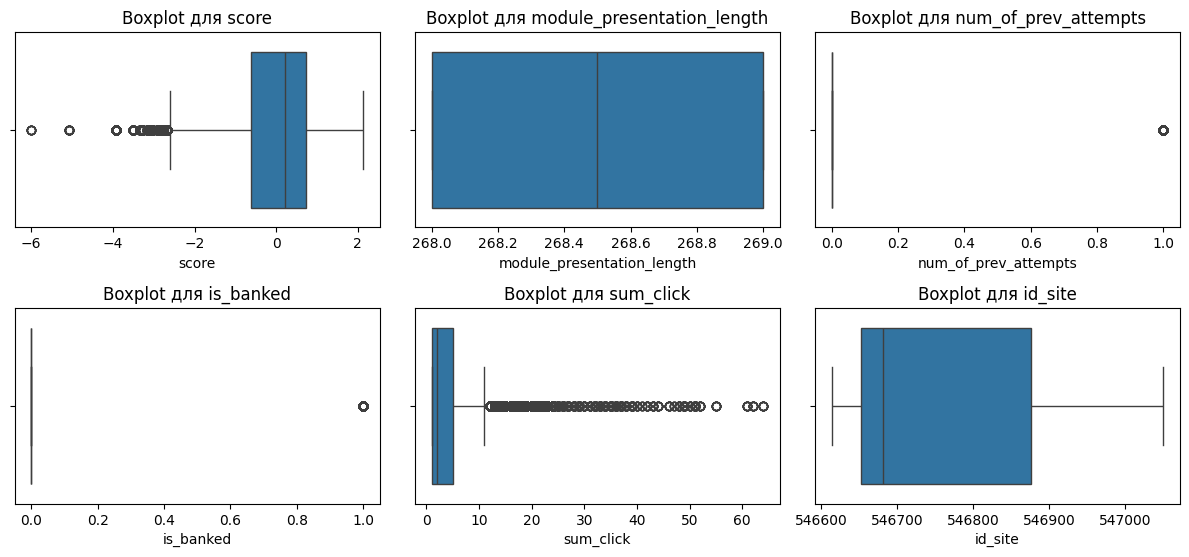

In [53]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df[['score','module_presentation_length', 'num_of_prev_attempts', 'is_banked', 'sum_click', 'id_site']]):
    plt.subplot(3, 3, i+1)  # Печатаем графики по 3 в ряду
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot для {column}')
    plt.tight_layout()
plt.show()

In [54]:
def detect_outliers_iqr(df: pd.DataFrame, numerical_columns: list) -> pd.DataFrame:
    """
    Функция для нахождения выбросов с использованием метода межквартильного размаха (IQR).
    :param df: DataFrame
    :param numerical_columns: Список числовых столбцов для анализа
    :return: DataFrame с индикаторами выбросов
    """
    outliers_list = []  # Список для хранения информации о выбросах

    for column in numerical_columns:
        # Вычисляем Q1, Q3 и IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Подсчитываем количество выбросов
        outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

        # Добавляем информацию о выбросах в список
        outliers_list.append({
            "column": column,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "outlier_count": outlier_count
        })

    # Преобразуем список в DataFrame и возвращаем
    return pd.DataFrame(outliers_list)


# Выбираем только числовые столбцы
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Получаем информацию о выбросах
outliers_info = detect_outliers_iqr(df, numerical_columns)

# Выводим информацию о выбросах
print(outliers_info)

                        column   lower_bound   upper_bound  outlier_count
0                code_module_x  0.000000e+00  0.000000e+00              0
1          code_presentation_x  0.000000e+00  0.000000e+00           4312
2                   id_student -2.607336e+06  4.893160e+06              0
3                       gender -1.500000e+00  2.500000e+00              0
4                       region -6.000000e+00  1.800000e+01              0
5            highest_education -3.000000e+00  5.000000e+00              0
6                     imd_band -4.500000e+00  1.550000e+01              0
7                     age_band -3.000000e+00  5.000000e+00              0
8         num_of_prev_attempts  0.000000e+00  0.000000e+00           4312
9              studied_credits  6.000000e+01  6.000000e+01          11228
10                  disability  0.000000e+00  0.000000e+00           1926
11                final_result  5.000000e-01  4.500000e+00           2616
12               id_assessment  1.7485

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Пример: нормализация числовых столбцов
numerical_columns = df.select_dtypes(include=[float, int]).columns

# 1. Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df_min_max.head())


Нормализованные данные (Min-Max):
   code_module_x  code_presentation_x  id_student  gender  region  \
0            0.0                  0.0         0.0     0.0     0.5   
1            0.0                  0.0         0.0     0.0     0.5   
3            0.0                  0.0         0.0     0.0     0.5   
4            0.0                  0.0         0.0     0.0     0.5   
5            0.0                  0.0         0.0     0.0     0.5   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0           0.333333  0.222222       1.0                   0.0   
1           0.333333  0.222222       1.0                   0.0   
3           0.333333  0.222222       1.0                   0.0   
4           0.333333  0.222222       1.0                   0.0   
5           0.333333  0.222222       1.0                   0.0   

   studied_credits  ...  date_submitted  is_banked     score  \
0              0.0  ...        0.097872        0.0  0.714286   
1              0.0  ...   

In [56]:
# Выводим уникальные значения для числовых столбцов
numerical_columns = df_min_max.select_dtypes(include=[float, int]).columns

for column in numerical_columns:
    unique_values = df_min_max[column].unique()
    print(f"Столбец: {column}")
    print(f"Количество уникальных чисел: {len(unique_values)}")
    print(f"Пример уникальных значений: {unique_values[:10]}")  # Первые 10 значений
    print("-" * 50)

Столбец: code_module_x
Количество уникальных чисел: 1
Пример уникальных значений: [0.]
--------------------------------------------------
Столбец: code_presentation_x
Количество уникальных чисел: 2
Пример уникальных значений: [0. 1.]
--------------------------------------------------
Столбец: id_student
Количество уникальных чисел: 295
Пример уникальных значений: [0.         0.00120006 0.00167987 0.00361555 0.0063906  0.00645802
 0.01090171 0.01141372 0.01153058 0.012643  ]
--------------------------------------------------
Столбец: gender
Количество уникальных чисел: 2
Пример уникальных значений: [0. 1.]
--------------------------------------------------
Столбец: region
Количество уникальных чисел: 13
Пример уникальных значений: [0.5        0.58333333 0.91666667 0.83333333 0.41666667 0.66666667
 0.         0.16666667 0.75       0.08333333]
--------------------------------------------------
Столбец: highest_education
Количество уникальных чисел: 4
Пример уникальных значений: [0.3333333

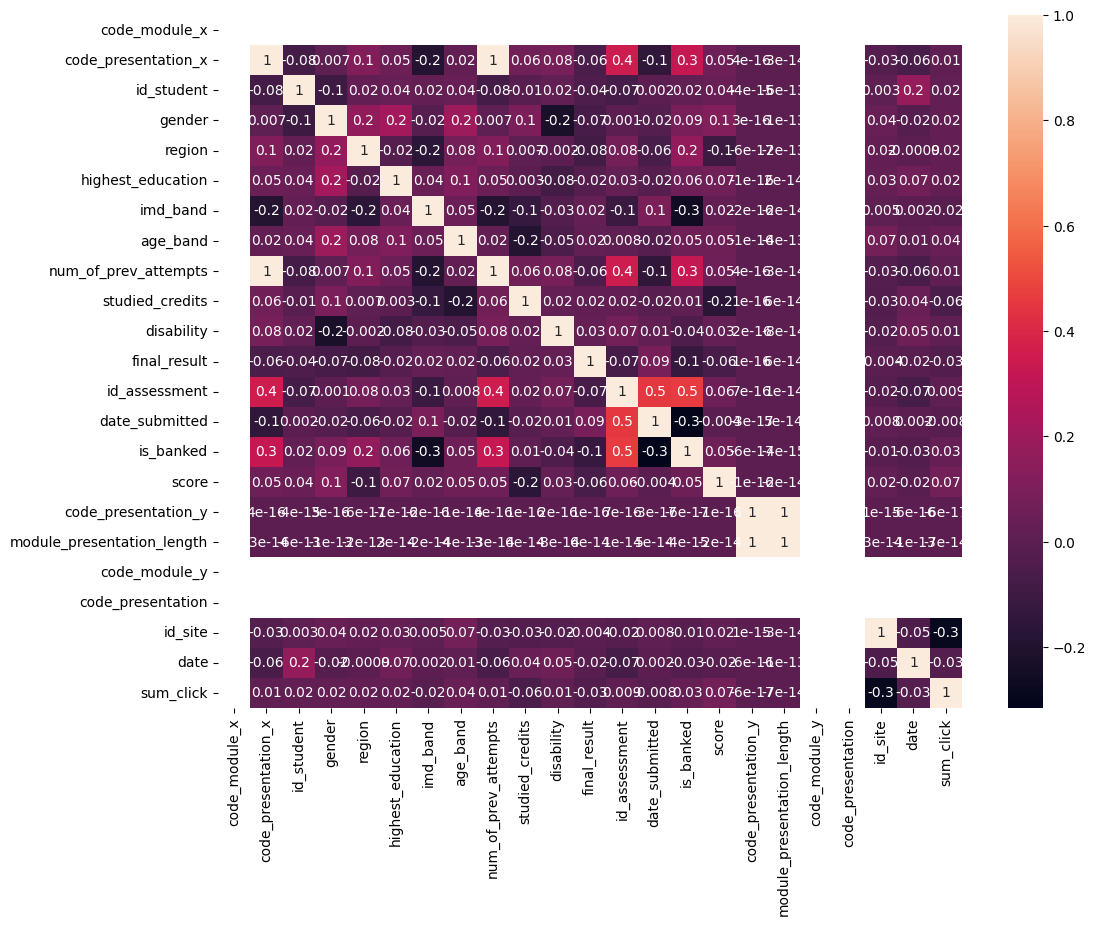

In [57]:
plt.figure(figsize=[12,9])
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

In [58]:
df=df.drop(['code_module_y', 'code_presentation','code_module_x','code_presentation_x','code_presentation_y'], axis=1)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [60]:
model = RandomForestClassifier(n_estimators=150, max_depth=20)

In [61]:
#обучение модели
model.fit(df[df.columns[df.columns!='final_result']], df.final_result)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [62]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'final_result'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

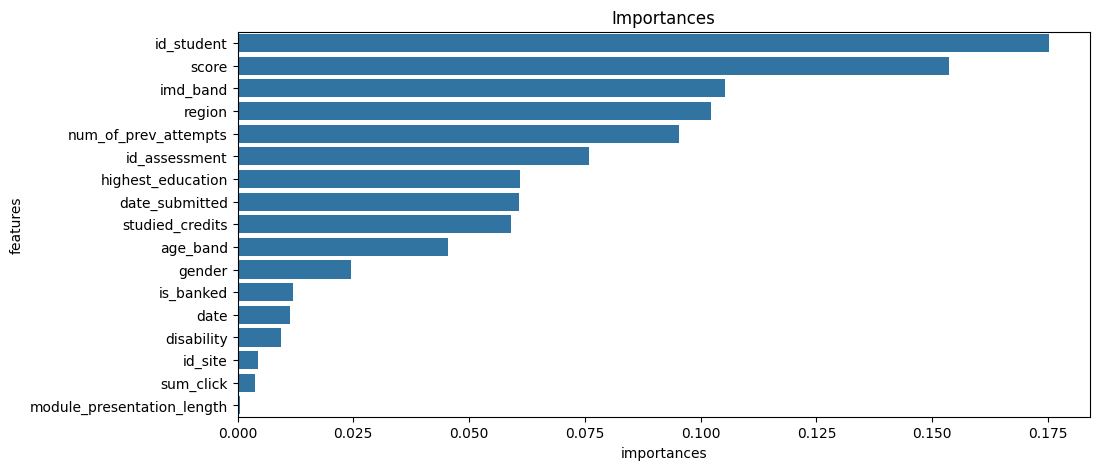

In [63]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances')
plt.show()

In [64]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), axis=1)

In [65]:
df.columns

Index(['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score'],
      dtype='object')

In [66]:
df = df.drop('id_student', axis=1)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import pickle

In [68]:
#Создание списка моделей
classs=[
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression(),
    RandomForestClassifier(),
]

In [69]:
log_col=["Classs","Acc"]
log=pd.DataFrame(columns=log_col)
x = df.drop('final_result', axis=1)  # Features (all columns except 'final_result')
y = df['final_result']  # Target variable ('final_result' column)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
acc_dict={}

In [70]:
output_dir='/content/gdrive/MyDrive/Projects/SP/models/saved_models'

In [71]:
for clf in classs:
    name=clf.__class__.__name__
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name]+=acc
    else:
        acc_dict[name] = acc

    # Формирование имени файла для сохранения
    file_name = os.path.join(output_dir, f"{name}.pkl")
    # Сохранение модели
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)
    print(f"Модель '{name}' сохранена в файл: {file_name}")

Модель 'KNeighborsClassifier' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl
Модель 'SVC' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/SVC.pkl
Модель 'DecisionTreeClassifier' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/DecisionTreeClassifier.pkl
Модель 'GaussianNB' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianNB.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель 'LogisticRegression' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl
Модель 'RandomForestClassifier' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl


In [72]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_col)
    log = pd.concat([log,log_entry], ignore_index = True)

<Axes: title={'center': 'Accuracy'}, xlabel='Accuracy', ylabel='Classs'>

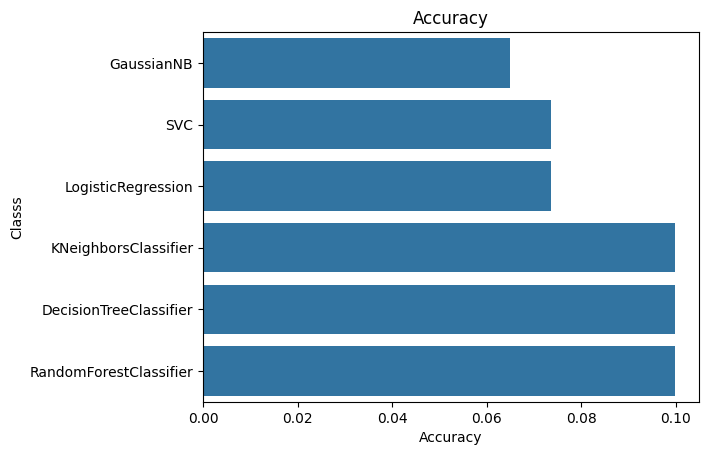

In [73]:
plt.xlabel('Accuracy')
plt.title("Accuracy")
sns.set_color_codes("muted")
sns.barplot(x='Acc',y='Classs', data=log.sort_values(by="Acc"))

Нейронная сеть

In [74]:
def traintest_f (data, target, model, split=0, scale='linear', **params):
    le = preprocessing.LabelEncoder()
    target_col = le.fit_transform(target)


    # convert integers to dummy variables (i.e. one hot encoded)
    target_col = to_categorical(target_label).astype(float)

    # define 0.01 - 0.1, 0.1 - 0.9, 0.91 - 0.99 sample if split array not defined
    if (split == 0):
        split = np.concatenate((np.linspace(0.01,0.09,9), np.linspace(0.1,0.9,9), np.linspace(0.91,0.99,9)), axis=None)

    print("Parameters")
    print(params)

    print("Split sample:")
    print(split)

    train_scores = []
    test_scores = []

    for s in split:

        print("Running with test size of: %0.2f" % s)

        # get train/test for this split
        d = model_selection.train_test_split(data, target_label,
                                             test_size=s, random_state=0)

        # get training and test data and targets
        train_data, test_data, train_target, test_target = d

        # Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.
        scaler = MinMaxScaler(feature_range=(0, 1))

        # Scale both the training inputs and outputs
        train_data = scaler.fit_transform(train_data)
        test_data = scaler.transform(test_data)

        # Train the model
        model.fit(
            train_data,
            train_target,
            **params,
            validation_data=(test_data, test_target)
        )

        train_error_rate = model.evaluate(train_data, train_target, verbose=0)
        test_error_rate = model.evaluate(test_data, test_target, verbose=0)

        # get test scores for fit and prediction
        train_scores.append(train_error_rate[1])
        test_scores.append(test_error_rate[1])

    # plot results
    plt.figure(figsize=(15.0, 5.0))
    if (scale == 'log'):
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plt.plot(split, train_scores, label='Training accuracy', marker='o')
    plt.plot(split, test_scores, label='Testing accuracy', marker='o')
    plt.title('Training and Testing Accuracy')
    plt.xlabel('Test sample proportion')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(0, 1.0, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim([min(split),max(split)])
    plt.ylim([0,1.01])
    plt.grid()
    plt.legend()

    return

In [75]:
def evaluate_model_accuracy(model, data, target_label_1d, **params):
    print("k-Fold Cross Validation")
    print("Parameters")
    print(params)

    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
    cvscores = []
    for train, test in kfold.split(data, target_label_1d):
        target_label = to_categorical(target_label_1d).astype(float)

        scaler = MinMaxScaler(feature_range=(0, 1))

        # Scale both the training inputs and outputs
        data[train] = scaler.fit_transform(data[train])
        data[test] = scaler.fit_transform(data[test])

        model.fit(data[train], target_label[train], epochs=100, verbose=0)

        scores = model.evaluate(data[test], target_label[test], verbose=0)
        print('{0:} : {1:0.2f}%'.format(model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print('Model Accuracy : {0:0.2f}% (+/- {1:0.2f}%)'.format(np.mean(cvscores), np.std(cvscores)))

    return np.mean(cvscores)

In [76]:
features_all = ['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score']
features_sm = [1, 4, 6, 10]
features = []
for i in features_sm:
    features.append(features_all[i])
features

['region', 'age_band', 'studied_credits', 'score']

In [77]:
print(features_sm)
print(df.columns)

[1, 4, 6, 10]
Index(['region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score'],
      dtype='object')


In [78]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [79]:
features_sm = [1, 4, 6, 10]
features = [features_all[i] for i in features_sm]
data = df.loc[:, features].astype(float).values
target= df.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d = le.fit_transform(target)

data.shape, target.shape, np.unique(target)

((50916, 4), (50916,), array([0, 1, 2, 3]))

In [80]:
def featuresplot(data, target, features, bclass):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(features):
        plt.subplot(1, len(features) , i+1)
        plt.hist(data[target == bclass, i], bins=50, color='green', alpha=0.5, label='Pass')
        plt.hist(data[target != bclass, i], bins=50, color='red', alpha=0.5, label='Fail')
        plt.title(col)
        plt.legend()
        plt.tight_layout()
    plt.show()
bclass = 0

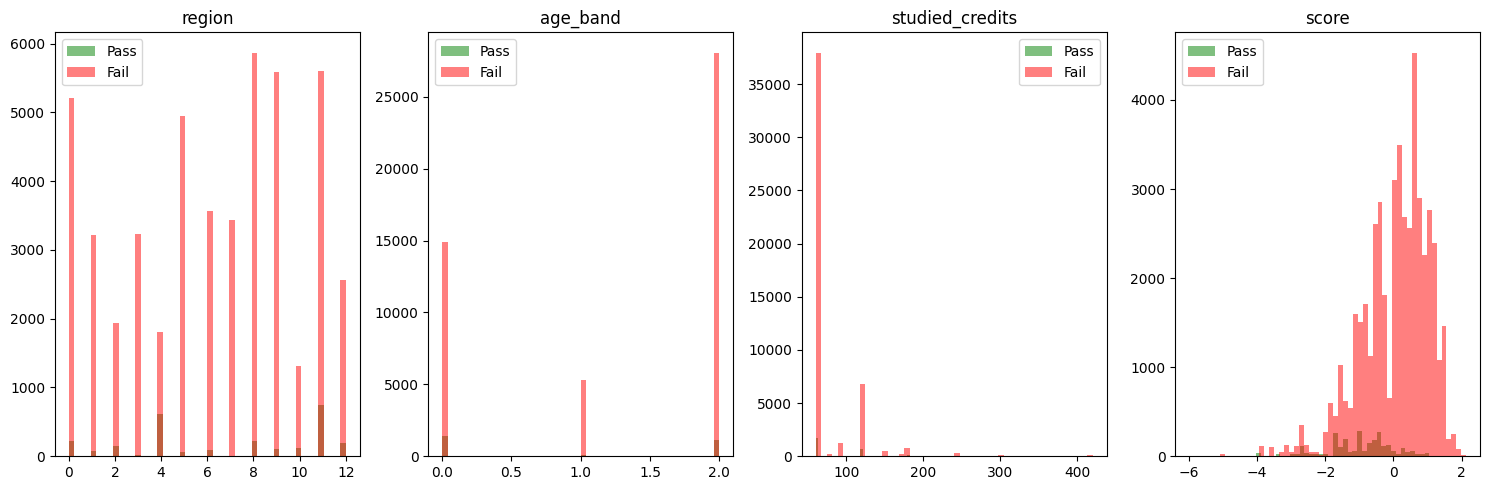

In [81]:
featuresplot(data, target, features, bclass)

In [82]:
from sklearn import model_selection

In [83]:
target_label = to_categorical(target_label_1d).astype(float)

In [84]:
# split data into training and test dataset
d = model_selection.train_test_split(
    data, target_label, test_size=0.2, random_state=0)

# get training and test data and targets
train_data, test_data, train_target, test_target = d

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(40732, 4) (40732, 4) (10184, 4) (10184, 4)


In [85]:
# Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [86]:
def baseline_model():
    # Define the model
    model = Sequential()
    model.add(Dense(350, kernel_initializer='uniform', input_dim=4, activation='relu'))
    # Change the output layer to have 4 neurons to match the target variable
    model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
model = baseline_model()

Parameters
{}
Split sample:
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5
 0.6  0.7  0.8  0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
Running with test size of: 0.01
1576/1576 [==============================] - 7s 4ms/step - loss: 0.8115 - accuracy: 0.7321 - val_loss: 0.6873 - val_accuracy: 0.7549
Running with test size of: 0.02
1560/1560 [==============================] - 3s 2ms/step - loss: 0.7186 - accuracy: 0.7326 - val_loss: 0.6607 - val_accuracy: 0.7517
Running with test size of: 0.03
1544/1544 [==============================] - 5s 3ms/step - loss: 0.6936 - accuracy: 0.7358 - val_loss: 0.6540 - val_accuracy: 0.7520
Running with test size of: 0.04
1528/1528 [==============================] - 10s 7ms/step - loss: 0.6783 - accuracy: 0.7406 - val_loss: 0.6372 - val_accuracy: 0.7555
Running with test size of: 0.05
1512/1512 [==============================] - 7s 5ms/step - loss: 0.6658 - accuracy: 0.7511 - val_loss: 0.6517 - val_accuracy: 0.7577
Running w

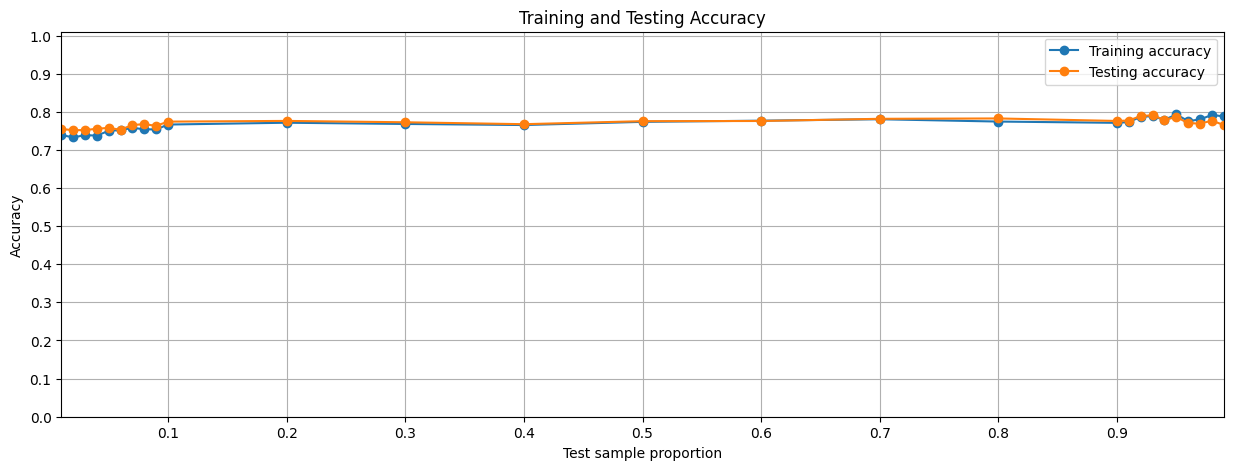

In [87]:
traintest_f(data=data, target=target,model=model)

In [88]:
RUN_NAME = 'run 6 epoch 800 nodes 350 relu,3 relu, adam'
# Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(
    log_dir='/content/gdrive/MyDrive/Projects/SP/logs{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True)

In [89]:
model.fit(
    train_data,
    train_target,
    epochs=50,
    shuffle=True,
    verbose=1,
    callbacks=[logger],
    validation_data=(test_data, test_target)
)


Epoch 1/50
1273/1273 [==============================] - 4s 3ms/step - loss: 0.5889 - accuracy: 0.7813 - val_loss: 0.5727 - val_accuracy: 0.7806
Epoch 2/50
1273/1273 [==============================] - 4s 3ms/step - loss: 0.5826 - accuracy: 0.7844 - val_loss: 0.5703 - val_accuracy: 0.7958
Epoch 3/50
1273/1273 [==============================] - 6s 4ms/step - loss: 0.5767 - accuracy: 0.7862 - val_loss: 0.5581 - val_accuracy: 0.7922
Epoch 4/50
1273/1273 [==============================] - 4s 3ms/step - loss: 0.5726 - accuracy: 0.7880 - val_loss: 0.5528 - val_accuracy: 0.7910
Epoch 5/50
1273/1273 [==============================] - 4s 3ms/step - loss: 0.5672 - accuracy: 0.7897 - val_loss: 0.5545 - val_accuracy: 0.8060
Epoch 6/50
1273/1273 [==============================] - 5s 4ms/step - loss: 0.5620 - accuracy: 0.7937 - val_loss: 0.5446 - val_accuracy: 0.7924
Epoch 7/50
1273/1273 [==============================] - 5s 4ms/step - loss: 0.5577 - accuracy: 0.7932 - val_loss: 0.5436 - val_accuracy:

In [90]:
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'  # Указываем директорию
os.makedirs(save_dir, exist_ok=True)  # Создаем папку, если её нет

# Сохранение модели
model.save(os.path.join(save_dir, 'first_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
test_error_rate = model.evaluate(test_data, test_target, verbose=1)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

319/319 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.8172
The categorical cross-entropy (CCE) for the test data set is: 0.4512
The accuracy of the test data set evaluation is: 81.72%


In [92]:
model_acc = evaluate_model_accuracy(model, data, target_label_1d, epochs=10, shuffle=True, verbose=1)

k-Fold Cross Validation
Parameters
{'epochs': 10, 'shuffle': True, 'verbose': 1}
accuracy : 84.96%
accuracy : 82.99%
accuracy : 84.72%
accuracy : 84.76%
accuracy : 83.05%
accuracy : 84.29%
accuracy : 86.37%
accuracy : 85.50%
accuracy : 83.28%
accuracy : 86.01%
Model Accuracy : 84.59% (+/- 1.14%)


In [93]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model1.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Model saved to disk at {save_path}.')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to disk at /content/gdrive/MyDrive/Projects/SP/models/saved_models/model1.h5.


In [94]:
X = df.drop("final_result", axis=1)  # Признаки
y = df["final_result"]               # Целевая переменная

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

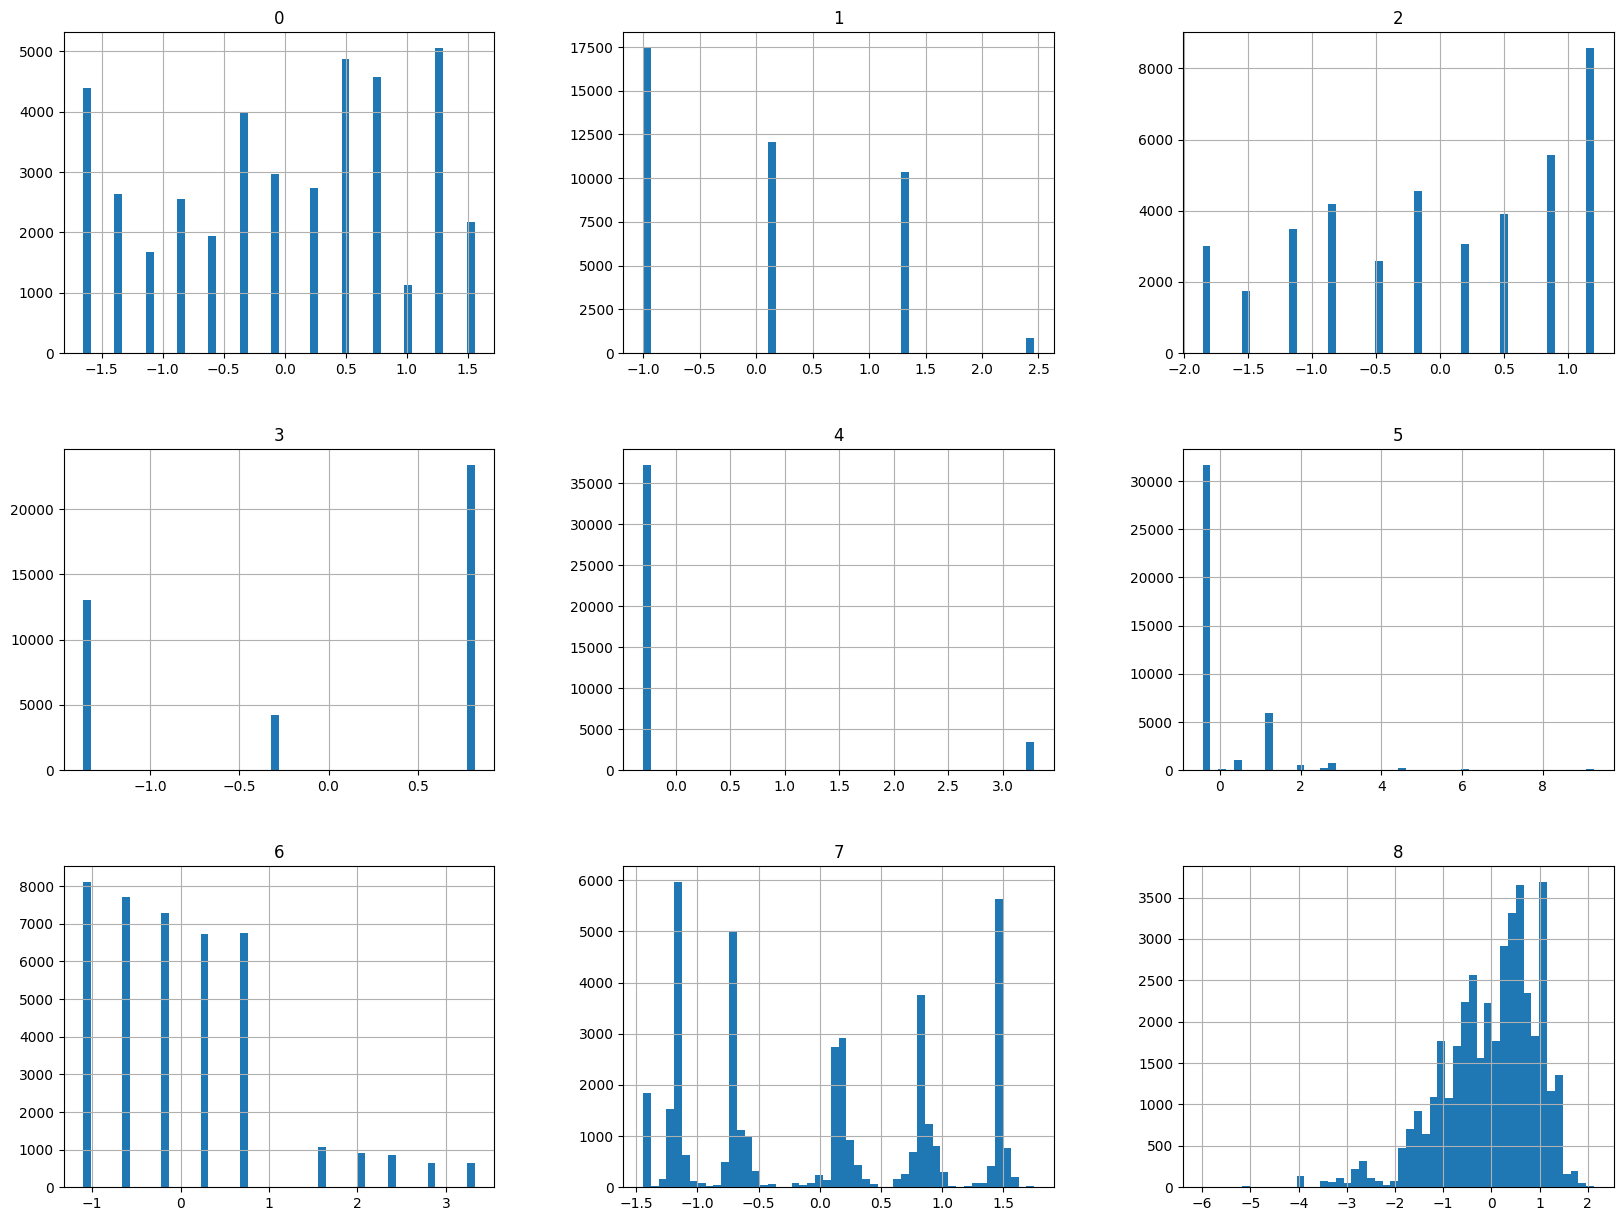

In [95]:
df = pd.DataFrame(X_train)  # Если данные в формате NumPy
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [96]:
corr_matrix = df.corr()
print(corr_matrix)


          0         1         2         3         4         5         6  \
0  1.000000 -0.020002 -0.164554  0.076065  0.112770  0.009721  0.078679   
1 -0.020002  1.000000  0.039486  0.111513  0.048107  0.002437  0.027894   
2 -0.164554  0.039486  1.000000  0.047821 -0.187316 -0.129798 -0.107502   
3  0.076065  0.111513  0.047821  1.000000  0.018774 -0.190685  0.010019   
4  0.112770  0.048107 -0.187316  0.018774  1.000000  0.060438  0.347386   
5  0.009721  0.002437 -0.129798 -0.190685  0.060438  1.000000  0.017458   
6  0.078679  0.027894 -0.107502  0.010019  0.347386  0.017458  1.000000   
7 -0.059719 -0.019906  0.096592 -0.017613 -0.147112 -0.020272  0.455633   
8 -0.106007  0.071940  0.021596  0.051284  0.057059 -0.167209  0.054713   

          7         8  
0 -0.059719 -0.106007  
1 -0.019906  0.071940  
2  0.096592  0.021596  
3 -0.017613  0.051284  
4 -0.147112  0.057059  
5 -0.020272 -0.167209  
6  0.455633  0.054713  
7  1.000000 -0.007759  
8 -0.007759  1.000000  


In [97]:
df = df.drop(df.columns[8],axis=1)

In [98]:
imp = SimpleImputer(strategy='mean')
df1['score'] = imp.fit_transform(df1['score'].values.reshape(-1, 1))
df1['score'].isnull().sum()

imp = SimpleImputer(strategy="most_frequent")
df1['imd_band'] = imp.fit_transform(df1['imd_band'].values.reshape(-1, 1)).ravel()
df1['imd_band'].isnull().sum()

df1 = df1.drop_duplicates().dropna()

In [99]:
df1.columns

Index(['code_module_x', 'code_presentation_x', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'code_presentation_y', 'module_presentation_length', 'code_module_y',
       'code_presentation', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [100]:
df1=convert_to_numeric(df1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
df1['score'] = sc_X.fit_transform(df1['score'].values.reshape(-1, 1))
df1['score'].describe()


from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df1['imd_band'] = encoder.fit_transform(df1['imd_band'])

# Пример: нормализация числовых столбцов
numerical_columns = df1.select_dtypes(include=[float, int]).columns

# 1. Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df1_min_max = df1.copy()
df1_min_max[numerical_columns] = min_max_scaler.fit_transform(df1[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df1_min_max.head())

df1=df1.drop(['code_module_y', 'code_presentation','code_module_x','code_presentation_x','code_presentation_y'], axis=1)

df1=df1.drop(['is_banked', 'date','id_site','module_presentation_length','sum_click'], axis=1)

Нормализованные данные (Min-Max):
   code_module_x  code_presentation_x  id_student  gender  region  \
0            0.0                  0.0         0.0     0.0     0.5   
1            0.0                  0.0         0.0     0.0     0.5   
3            0.0                  0.0         0.0     0.0     0.5   
4            0.0                  0.0         0.0     0.0     0.5   
5            0.0                  0.0         0.0     0.0     0.5   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0           0.333333  0.222222       0.5                   0.0   
1           0.333333  0.222222       0.5                   0.0   
3           0.333333  0.222222       0.5                   0.0   
4           0.333333  0.222222       0.5                   0.0   
5           0.333333  0.222222       0.5                   0.0   

   studied_credits  ...  date_submitted  is_banked     score  \
0              0.0  ...        0.097872        0.0  0.714286   
1              0.0  ...   

In [101]:
df1.columns

Index(['id_student', 'gender', 'region', 'highest_education', 'imd_band',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'id_assessment', 'date_submitted', 'score'],
      dtype='object')

In [102]:
f1type = []
for f in df1.final_result:
  if (f == 'Pass'):
     f1type.append('1')
  elif (f == 'Withdrawn'):
     f1type.append('1')
  elif (f == 'Distinction'):
     f1type.append('0')
  elif (f == 'Fail'):
     f1type.append('0')
  else:
    f1type.append('0')
df1['final_result'] = f1type

In [103]:
features_all1 = ['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score']
features_sm1 = [1, 3, 4, 6, 10]
features1 = []
for i in features_sm1:
    features1.append(features_all1[i])
features1

['region', 'imd_band', 'age_band', 'studied_credits', 'score']

In [104]:
features_sm1 = [1, 2, 4, 6, 10]
features1 = [features_all1[i] for i in features_sm1]
data1 = df1.loc[:, features].astype(float).values
target1= df1.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d1 = le.fit_transform(target1)

data1.shape, target1.shape, np.unique(target1)

((50916, 4), (50916,), array(['0'], dtype=object))

In [105]:
target_label1 = to_categorical(target_label_1d1).astype(float)

In [106]:
# split data into training and test dataset
d1 = model_selection.train_test_split(
    data1, target_label1, test_size=0.2, random_state=0)

# get training and test data and targets
train_data, test_data, train_target, test_target = d1

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(40732, 4) (40732, 1) (10184, 4) (10184, 1)


In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [108]:
from tensorflow.keras.regularizers import l2


In [109]:
def baseline_model():
    # Define the model
    model = Sequential()
    model.add(Dense(300, activation='relu', input_dim=4, kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model1 = baseline_model()

In [110]:
RUN_NAME = 'run 6 epoch 800 nodes 350 relu,3 relu, adam'

# Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(
    log_dir='/Projects/SP/logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True)

In [111]:
print(test_data.shape)

(10184, 4)


In [112]:
test_error_rate = model1.evaluate(test_data, test_target, verbose=1)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

319/319 [==============================] - 1s 2ms/step - loss: 0.8175 - accuracy: 0.0000e+00
The categorical cross-entropy (CCE) for the test data set is: 0.8175
The accuracy of the test data set evaluation is: 0.00%


In [113]:
model_acc1 = evaluate_model_accuracy(model1, data1, target_label_1d1, epochs=10, shuffle=True, verbose=0)

k-Fold Cross Validation
Parameters
{'epochs': 10, 'shuffle': True, 'verbose': 0}
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
accuracy : 100.00%
Model Accuracy : 100.00% (+/- 0.00%)


In [114]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model2.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Model saved to disk at {save_path}.')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to disk at /content/gdrive/MyDrive/Projects/SP/models/saved_models/model2.h5.


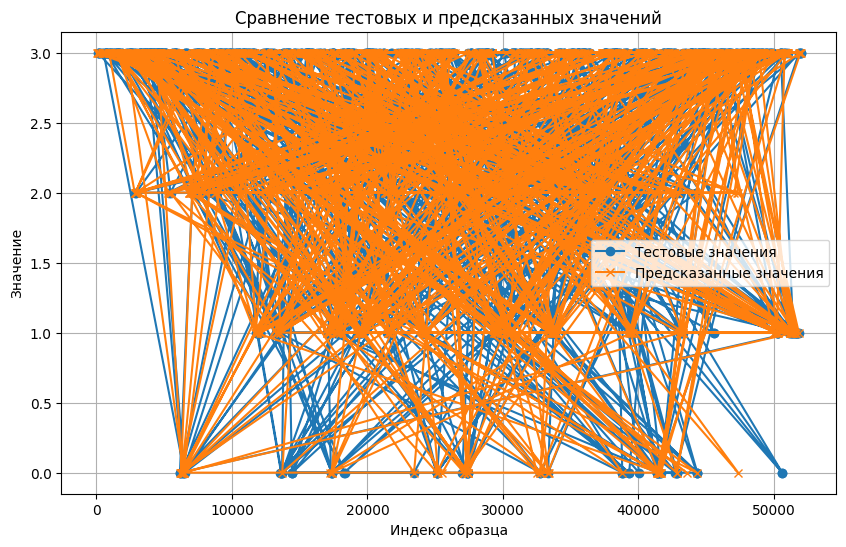

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:1000], label='Тестовые значения', marker='o')
plt.plot(y_train[:1000], label='Предсказанные значения', marker='x')
plt.title('Сравнение тестовых и предсказанных значений')
plt.xlabel('Индекс образца')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

In [116]:
train_target = to_categorical(train_target, num_classes=4)
test_target = to_categorical(test_target, num_classes=4)

print(train_target.shape)  # Ожидаемая форма: (n_samples, 4)
print(test_target.shape)   # Ожидаемая форма: (n_samples, 4)

(40732, 4)
(10184, 4)


In [117]:
def improved_model():
    model = Sequential()
    # Первый скрытый слой с Dropout и L2-регуляризацией
    Dense(128, activation='relu', kernel_regularizer=l2(0.02))
    model.add(Dropout(0.3))  # Dropout для предотвращения переобучения
    model.add(BatchNormalization())  # Нормализация для ускорения сходимости

    # Второй скрытый слой
    model.add(Dense(64, kernel_initializer='uniform', activation='relu', kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.3))  # Dropout

    # Выходной слой с softmax для многоклассовой классификации
    model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))

    # Компиляция модели с оптимизатором Adam
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

    return model

# Создание модели
model = improved_model()

# Применение ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(
    train_data,
    train_target,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_data=(test_data, test_target),
    callbacks=[early_stopping]  # Использование ранней остановки
)

Epoch 1/50
1273/1273 [==============================] - 5s 3ms/step - loss: 0.1777 - accuracy: 0.9984 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2/50
1273/1273 [==============================] - 4s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.2158e-04 - val_accuracy: 1.0000
Epoch 3/50
1273/1273 [==============================] - 6s 4ms/step - loss: 2.7208e-04 - accuracy: 1.0000 - val_loss: 9.5326e-05 - val_accuracy: 1.0000
Epoch 4/50
1273/1273 [==============================] - 4s 3ms/step - loss: 1.0265e-04 - accuracy: 1.0000 - val_loss: 3.5032e-05 - val_accuracy: 1.0000
Epoch 5/50
1273/1273 [==============================] - 4s 3ms/step - loss: 4.5473e-05 - accuracy: 1.0000 - val_loss: 1.4049e-05 - val_accuracy: 1.0000
Epoch 6/50
1273/1273 [==============================] - 5s 4ms/step - loss: 2.1890e-05 - accuracy: 1.0000 - val_loss: 5.8660e-06 - val_accuracy: 1.0000
Epoch 7/50
1273/1273 [==============================] - 5s 4ms/step - loss: 1.0870e-05 - accuracy: 1

In [118]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model3.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Model saved to disk at {save_path}.')

Model saved to disk at /content/gdrive/MyDrive/Projects/SP/models/saved_models/model3.h5.


In [140]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = все сообщения, 1 = фильтруются INFO, 2 = фильтруются WARNING, 3 = фильтруются все, кроме ошибок

# Для подавления конкретного предупреждения
tf.get_logger().setLevel('ERROR')

# Данные для примера
data = np.random.rand(100, 4)  # 100 строк, 4 признака
target_label_1d = np.random.randint(0, 2, 100)  # Бинарные метки (0 или 1)

# Функция для создания модели
def create_model(neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compiled = True
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Обертка модели
model = KerasClassifier(model=create_model, verbose=0)

# Сетка параметров
param_grid = {'model__neurons': [5, 10, 20, 50, 100]}

# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')

# Поиск
grid_result = grid.fit(data, target_label_1d)

# Результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
 

Best: 0.540107 using {'model__neurons': 5}


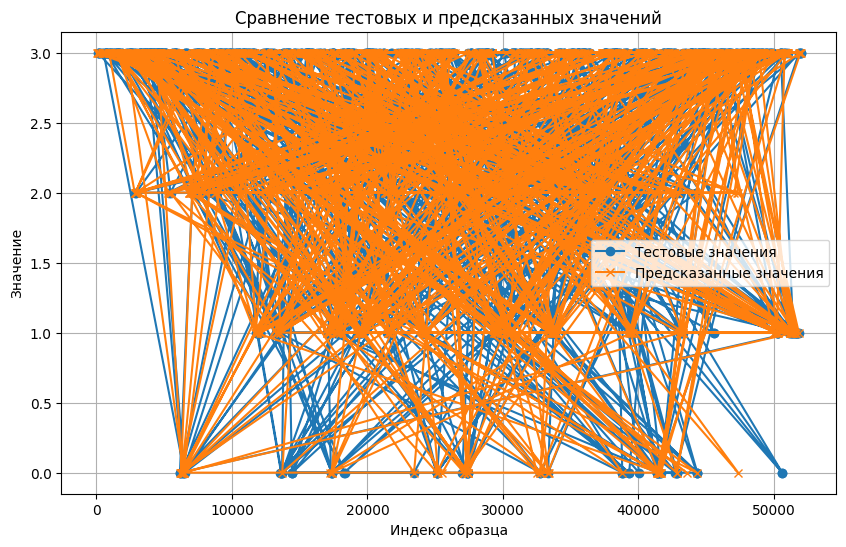

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:1000], label='Тестовые значения', marker='o')
plt.plot(y_train[:1000], label='Предсказанные значения', marker='x')
plt.title('Сравнение тестовых и предсказанных значений')
plt.xlabel('Индекс образца')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

imp = SimpleImputer(strategy='mean')
df['score'] = imp.fit_transform(df['score'].values.reshape(-1, 1))
df['score'].isnull().sum()

imp = SimpleImputer(strategy="most_frequent")
df['imd_band'] = imp.fit_transform(df['imd_band'].values.reshape(-1, 1)).ravel()
df['imd_band'].isnull().sum()

df = df.drop_duplicates().dropna()



df=convert_to_numeric(df)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
df['score'] = sc_X.fit_transform(df['score'].values.reshape(-1, 1))
df['score'].describe()


from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df['imd_band'] = encoder.fit_transform(df['imd_band'])
df.head()



# Пример: нормализация числовых столбцов
numerical_columns = df.select_dtypes(include=[float, int]).columns

# 1. Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df_min_max.head())

df=df.drop(['code_module_y', 'code_presentation','code_module_x','code_presentation_x','code_presentation_y'], axis=1)

df=df.drop(['is_banked', 'date','id_site','module_presentation_length','sum_click'], axis=1)